In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [4]:
df = pd.read_csv('C:/Users/kodip/OneDrive/文档/uber1.csv.csv')

In [5]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [6]:
print(df[df.duplicated()])


Empty DataFrame
Columns: [pickup, dropoff, passengers, distance, fare, tip, tolls, total, color, payment, pickup_zone, dropoff_zone, pickup_borough, dropoff_borough]
Index: []


In [7]:
df.tail()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [15]:
print(df.isnull().sum())

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


In [17]:
df['payment'] = df['payment'].fillna('Unknown')
df['pickup_zone'] = df['pickup_zone'].fillna('Unknown')
df['dropoff_zone'] = df['dropoff_zone'].fillna('Unknown')
df['pickup_borough'] = df['pickup_borough'].fillna('Unknown')
df['dropoff_borough'] = df['dropoff_borough'].fillna('Unknown')


In [36]:
print(df.isnull().sum())

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64


In [19]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


pickup: 6414 unique values
dropoff: 6425 unique values
color: 2 unique values
payment: 3 unique values
pickup_zone: 195 unique values
dropoff_zone: 204 unique values
pickup_borough: 5 unique values
dropoff_borough: 6 unique values


In [21]:
print(df.describe())

        passengers     distance         fare         tip        tolls  \
count  6433.000000  6433.000000  6433.000000  6433.00000  6433.000000   
mean      1.539251     3.024617    13.091073     1.97922     0.325273   
std       1.203768     3.827867    11.551804     2.44856     1.415267   
min       0.000000     0.000000     1.000000     0.00000     0.000000   
25%       1.000000     0.980000     6.500000     0.00000     0.000000   
50%       1.000000     1.640000     9.500000     1.70000     0.000000   
75%       2.000000     3.210000    15.000000     2.80000     0.000000   
max       6.000000    36.700000   150.000000    33.20000    24.020000   

             total  
count  6433.000000  
mean     18.517794  
std      13.815570  
min       1.300000  
25%      10.800000  
50%      14.160000  
75%      20.300000  
max     174.820000  


In [23]:
print(df.select_dtypes(include='object').describe())

                     pickup              dropoff   color      payment  \
count                  6433                 6433    6433         6433   
unique                 6414                 6425       2            3   
top     2019-03-13 10:57:06  2019-03-04 18:08:13  yellow  credit card   
freq                      2                    2    5451         4577   

           pickup_zone           dropoff_zone pickup_borough dropoff_borough  
count             6433                   6433           6433            6433  
unique             195                    204              5               6  
top     Midtown Center  Upper East Side North      Manhattan       Manhattan  
freq               230                    245           5268            5206  


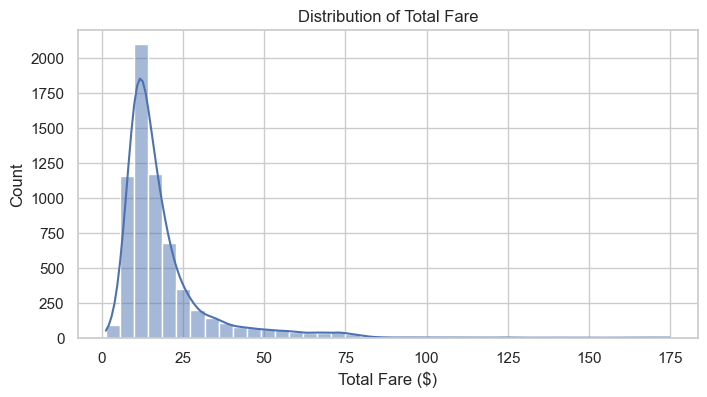

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.histplot(df['total'], bins=40, kde=True)
plt.title("Distribution of Total Fare")
plt.xlabel("Total Fare ($)")
plt.ylabel("Count")
plt.show()

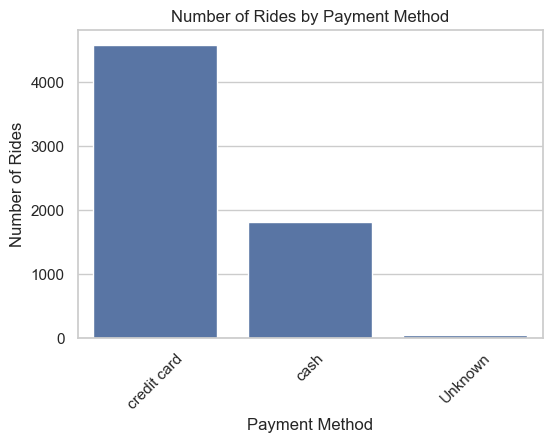

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='payment', data=df)
plt.title("Number of Rides by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

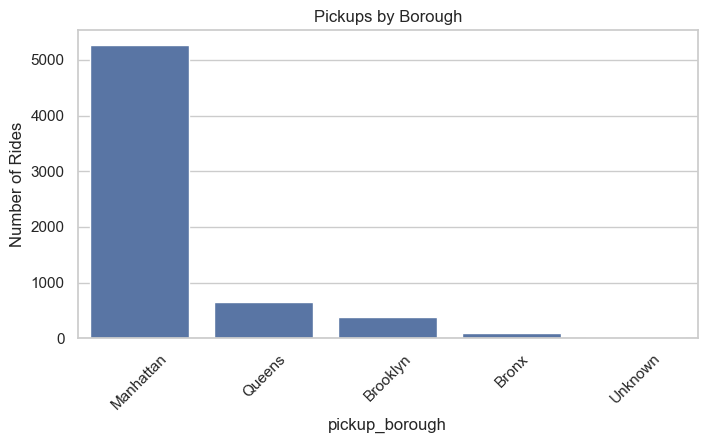

In [29]:
plt.figure(figsize=(8, 4))
sns.countplot(x='pickup_borough', data=df, order=df['pickup_borough'].value_counts().index)
plt.title("Pickups by Borough")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()


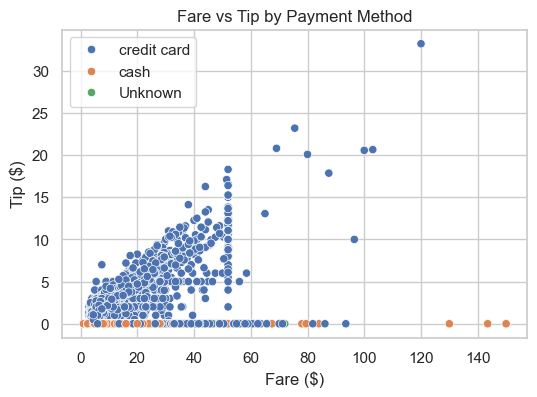

In [31]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='fare', y='tip', hue='payment', data=df)
plt.title("Fare vs Tip by Payment Method")
plt.xlabel("Fare ($)")
plt.ylabel("Tip ($)")
plt.legend()
plt.show()

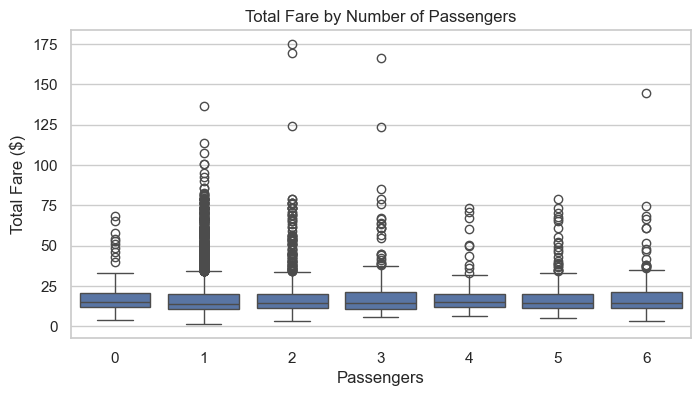

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='passengers', y='total', data=df)
plt.title("Total Fare by Number of Passengers")
plt.xlabel("Passengers")
plt.ylabel("Total Fare ($)")
plt.show()

In [ ]:
conclusion
1.Distribution of Total Fare
2.Number of Rides by Payment Method
3.Borough-Wise Pickup Count
4.Fare vs Tip by Payment Method
5.Total Fare by Number of Passengers